### Problem Statement - Fraud Detection in Transaction Data using KNN

We want to detect fraud in financial transaction data using K Nearest Neighbour algorithm. 

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### What is KNN

In machine learning, k Nearest Neighbours or kNN is the simplest of all machine learning algorithms. It is a non-parametric algorithm used for classification and regression tasks. Non-parametric means there is no assumption required for data distribution. So, kNN does not require any underlying assumption to be made. In both classification and regression tasks, the input consists of the k closest training examples in the feature space. The output depends upon whether kNN is used for classification or regression purposes.

In kNN classification, the output is a class membership. The given data point is classified based on the majority of type of its neighbours. The data point is assigned to the most frequent class among its k nearest neighbours. Usually k is a small positive integer. If k=1, then the data point is simply assigned to the class of that single nearest neighbour.

In kNN regression, the output is simply some property value for the object. This value is the average of the values of k nearest neighbours.

kNN is a type of instance-based learning or lazy learning. Lazy learning means it does not require any training data points for model generation. All training data will be used in the testing phase. This makes training faster and testing slower and costlier. So, the testing phase requires more time and memory resources.

In kNN, the neighbours are taken from a set of objects for which the class or the object property value is known. This can be thought of as the training set for the kNN algorithm, though no explicit training step is required. In both classification and regression kNN algorithm, we can assign weight to the contributions of the neighbours. So, nearest neighbours contribute more to the average than the more distant ones.

Eager learners mean when giving training data points, we will construct a generalized model before performing prediction on given new points to classify. We can think of such learners as being ready, active and eager to classify new data points.

Lazy learning means there is no need for learning or training of the model and all of the data points are used at the time of prediction. Lazy learners wait until the last minute before classifying any data point. They merely store the training dataset and waits until classification needs to perform. Lazy learners are also known as instance-based learners because lazy learners store the training points or instances, and all learning is based on instances.

Unlike eager learners, lazy learners do less work in the training phase and more work in the testing phase to make a classification.




##### How it works?

The kNN algorithm intuition is very simple to understand. It simply calculates the distance between a sample data point and all the other training data points. The distance can be Euclidean distance or Manhattan distance. Then, it selects the k nearest data points where k can be any integer. Finally, it assigns the sample data point to the class to which the majority of the k data points belong.


##### How to find optimal k?

While building the kNN classifier model, one question that come to my mind is what should be the value of nearest neighbours (k) that yields highest accuracy. This is a very important question because the classification accuracy depends upon our choice of k.

The number of neighbours (k) in kNN is a parameter that we need to select at the time of model building. Selecting the optimal value of k in kNN is the most critical problem. A small value of k means that noise will have higher influence on the result. So, probability of overfitting is very high. A large value of k makes it computationally expensive in terms of time to build the kNN model. Also, a large value of k will have a smoother decision boundary which means lower variance but higher bias.

The data scientists choose an odd value of k if the number of classes is even. We can apply the elbow method to select the value of k. To optimize the results, we can use Cross Validation technique. Using the cross-validation technique, we can test the kNN algorithm with different values of k. The model which gives good accuracy can be considered to be an optimal choice. It depends on individual cases and at times best process is to run through each possible value of k and test our result.

### 1. Import Libraries

In [3]:
# All Package Imports
import pandas as pd
import numpy as np
import os
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import time

# import sklearn packages for modelling
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve


### 2. Load data

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# view dimensions of dataset
df.shape

(1191, 31)

There are 1191 rows and 31 columns in the dataset.

### 3. Exploratory Data Analysis

In [6]:
# remove irrelevant features
df = df.drop(['Time'],axis =1)
df.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


We should drop any redundant columns from the dataset which does not have any predictive power. Here, Time is the redundant column and hence i dropped it.

In [7]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1191 non-null   float64
 1   V2      1191 non-null   float64
 2   V3      1191 non-null   float64
 3   V4      1191 non-null   float64
 4   V5      1191 non-null   float64
 5   V6      1191 non-null   float64
 6   V7      1191 non-null   float64
 7   V8      1191 non-null   float64
 8   V9      1191 non-null   float64
 9   V10     1191 non-null   float64
 10  V11     1191 non-null   float64
 11  V12     1191 non-null   float64
 12  V13     1191 non-null   float64
 13  V14     1191 non-null   float64
 14  V15     1191 non-null   float64
 15  V16     1191 non-null   float64
 16  V17     1191 non-null   float64
 17  V18     1191 non-null   float64
 18  V19     1191 non-null   float64
 19  V20     1191 non-null   float64
 20  V21     1191 non-null   float64
 21  V22     1191 non-null   float64
 22  

There are only numerical columns in the dataset. No categorical features are present. V1-V28, Amount are the independent variables and Class is the dependent variable. 

In [8]:
# get the numeric column names
numeric_cols = []

for k in dict(df.dtypes):
    if dict(df.dtypes)[k] in ['float64','float32','int64','int32']:
        numeric_cols.append(k)        
        
numeric_cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [9]:
# get the categorical column names
categorical_cols = []

for k in dict(df.dtypes):
    if dict(df.dtypes)[k] in ['object']:
        categorical_cols.append(k)
        
        
categorical_cols

[]

There are no categorical variables.

In [12]:
# check columns data types by count

df.dtypes.value_counts()
df_dtypes = pd.DataFrame(df.dtypes.value_counts().reset_index())
df_dtypes.columns = ['dtypes','columns']
df_dtypes


,dtypes,columns
0,float64,29
1,int64,1


<AxesSubplot:ylabel='Density'>

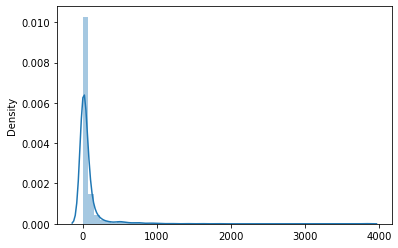

In [13]:
# check distribution of Amount
amount = [df['Amount'].values]
sns.distplot(amount)

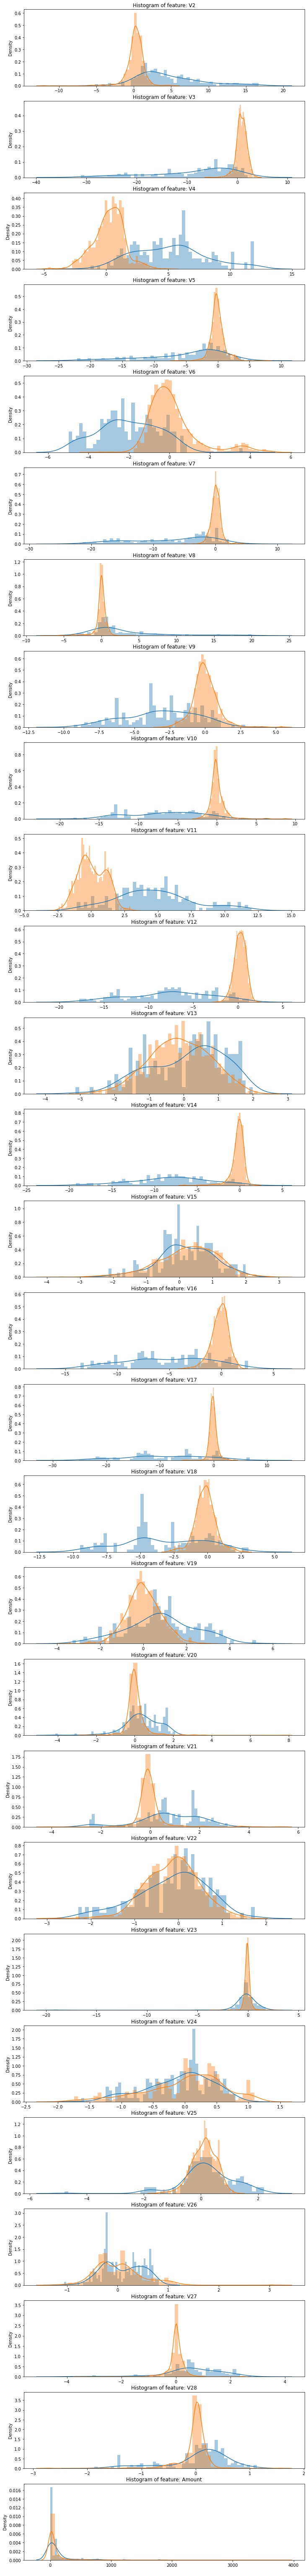

In [14]:
# check distribution of independent variables, V1-V28
plt.figure(figsize=(12,28*4))
grid_space = gridspec.GridSpec(28,1)

#cols = df.iloc[:,1:29].columns

for i, c in enumerate(df[df.iloc[:,1:29].columns]):
    ax = plt.subplot(grid_space[i])
    sns.distplot(df[c][df['Class']==1],bins=50)
    sns.distplot(df[c][df['Class']==0],bins=50)
    ax.set_xlabel(' ')
    ax.set_title('Histogram of feature: ' + str(c))
plt.show()
    

All independent features are floats and the dependent variable is integer. All variables are positively skewed.

In [15]:
# describe the categorical data 
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,...,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,-1.224016,0.942978,-0.690338,1.046707,-0.809904,-0.195756,-1.047084,0.454245,-0.510057,-1.048724,...,0.125966,-0.128940,-0.070197,-0.015527,0.132017,0.037807,0.104899,-0.006757,71.028925,0.162888
std,4.123068,2.578204,4.994825,2.457333,3.174951,1.512986,3.790665,2.495252,1.739402,3.177958,...,0.817318,0.647872,0.727216,0.602504,0.545687,0.460593,0.585943,0.339297,192.026373,0.369419
min,-30.552380,-12.114213,-31.103685,-4.657545,-22.105532,-4.977692,-21.922811,-7.494658,-9.283925,-18.271168,...,-4.134608,-2.776923,-19.254328,-1.867208,-4.781606,-1.243924,-3.908080,-2.735623,0.000000,0.000000
25%,-1.247088,-0.098080,-0.133344,-0.285854,-0.838137,-0.836937,-0.673663,-0.152539,-0.746082,-0.675266,...,-0.209303,-0.551859,-0.194287,-0.372789,-0.177064,-0.288574,-0.040726,-0.028550,3.790000,0.000000
50%,-0.485238,0.445575,0.639922,0.614899,-0.214256,-0.233421,-0.001112,0.072841,-0.183811,-0.184663,...,-0.050148,-0.093159,-0.056486,0.076211,0.148452,0.013626,0.033931,0.024008,15.800000,0.000000
75%,1.089880,1.104180,1.393512,1.379459,0.405725,0.342190,0.503928,0.400059,0.379457,0.189274,...,0.174052,0.301762,0.084489,0.411450,0.456565,0.296551,0.204157,0.110458,61.905000,0.000000
max,1.685314,16.713389,4.017561,11.927512,7.672544,5.122103,5.431271,20.007208,5.459274,8.821756,...,5.273420,1.745315,3.150413,1.215279,2.208209,3.087444,3.052358,1.575380,3828.040000,1.000000


Since the data in different columns have varied ranges, we need to scale the data.

###### Missing Values Handling

In [16]:
# handling missing values

# %age of missing values
missing_value = df.isnull().sum()
missing_value_percent = ((df.isnull().sum())/len(df)) * 100
missing_value_df = pd.concat([missing_value,missing_value_percent], axis=1)
missing_value_df

missing_value_df.columns = ['Missing Values', 'Percentage Missing Values']
missing_value_df


,Missing Values,Percentage Missing Values
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0
V9,0,0.0
V10,0,0.0


There are no missing variables in the dataset.

###### Outlier Handling

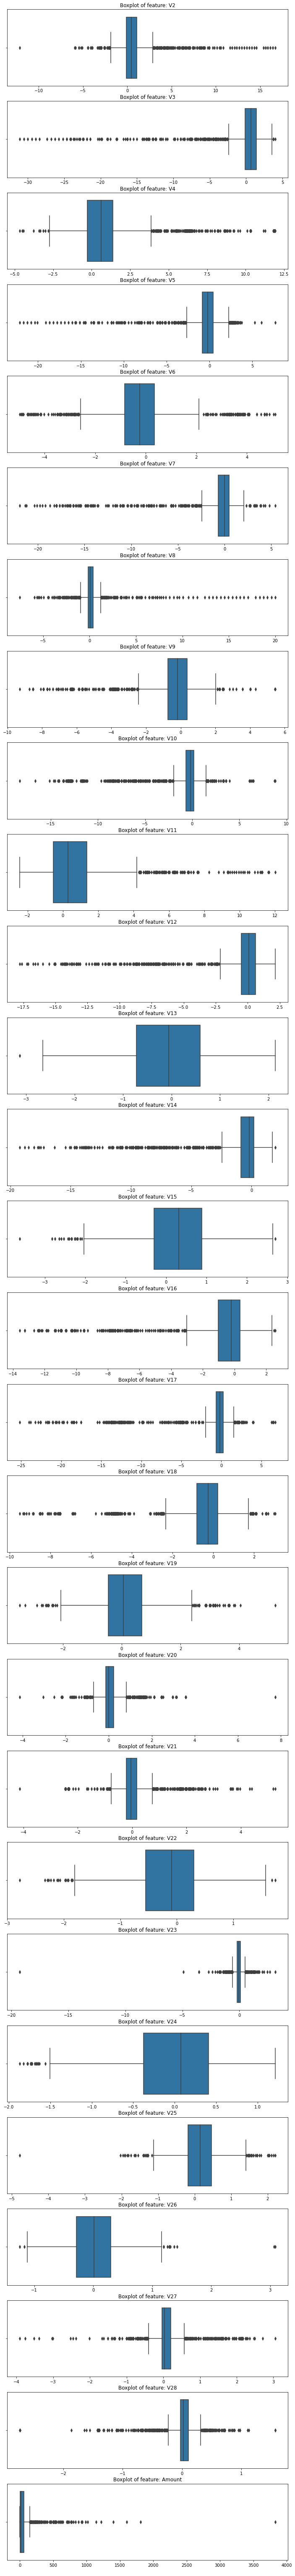

In [17]:
# distribution of independent variables, V1-V28
plt.figure(figsize=(12,28*4))
grid_space = gridspec.GridSpec(28,1)

for i, c in enumerate(df[df.iloc[:,1:29].columns]):
    ax = plt.subplot(grid_space[i])
    sns.boxplot(x=df[c])
    ax.set_xlabel(' ')
    ax.set_title('Boxplot of feature: ' + str(c))
plt.show()

All the variables have data points beyond their whiskers.

###### Removing outlier

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

In [18]:
# get IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

V1         2.336967
V2         1.202260
V3         1.526856
V4         1.665313
V5         1.243862
V6         1.179127
V7         1.177592
V8         0.552598
V9         1.125538
V10        0.864541
V11        1.908252
V12        1.126782
V13        1.316500
V14        1.080829
V15        1.184005
V16        1.361692
V17        0.899088
V18        1.030824
V19        1.141933
V20        0.386015
V21        0.383354
V22        0.853620
V23        0.278776
V24        0.784239
V25        0.633629
V26        0.585125
V27        0.244882
V28        0.139008
Amount    58.115000
Class      0.000000
dtype: float64

In [19]:
# below code will give an output with some true and false values. The data point where we have False that means these values
# are valid whereas True indicates presence of an outlier.
(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,False,False,True,True,False,False,True,False,True,True,...,True,False,False,False,False,False,True,True,False,True
1187,False,False,True,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
1188,False,False,True,False,True,False,False,True,False,True,...,True,False,False,False,False,False,True,False,True,True
1189,True,True,True,True,True,False,True,True,True,True,...,True,True,True,False,False,False,False,False,False,True


In [20]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(592, 30)

In [21]:
# Independent variable 
df_out['Class'].value_counts()

0    592
Name: Class, dtype: int64

Since the outlier removal is getting rid of all the Class = '1' rows, making the dataset ineligible for building a classifier, we will not remove the outliers.

Also KNN algorithm is robust to outliers, for higher values of k.

###### Correlation analysis

In [22]:
# heat map of correlation of features
cor= df.corr()
cor

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,-0.820375,0.874481,-0.599671,0.852142,0.495271,0.860773,-0.779344,0.598867,0.686396,...,-0.283913,0.160701,0.182482,-0.010745,-0.154776,0.005546,-0.309195,0.120334,-0.104289,-0.575247
V2,-0.820375,1.000000,-0.870836,0.670435,-0.783531,-0.556859,-0.807687,0.741477,-0.642396,-0.708304,...,0.319286,-0.204317,-0.132276,-0.034675,0.198518,0.010092,0.377574,0.034667,-0.208151,0.631650
V3,0.874481,-0.870836,1.000000,-0.754549,0.853307,0.557123,0.924495,-0.783934,0.731176,0.833005,...,-0.275849,0.187225,0.159555,0.064669,-0.249427,-0.034606,-0.433075,0.009926,-0.067227,-0.711600
V4,-0.599671,0.670435,-0.754549,1.000000,-0.596521,-0.474408,-0.748905,0.489224,-0.744023,-0.792558,...,0.239654,0.034856,-0.107167,-0.067729,0.083034,0.099570,0.408336,0.012027,0.062118,0.746038
V5,0.852142,-0.783531,0.853307,-0.596521,1.000000,0.526069,0.859186,-0.815868,0.620657,0.707101,...,-0.337836,0.131236,0.126502,-0.037540,-0.205503,-0.029248,-0.285112,0.024744,-0.159069,-0.554263
V6,0.495271,-0.556859,0.557123,-0.474408,0.526069,1.000000,0.540145,-0.459042,0.469858,0.541934,...,-0.206559,0.122556,0.115472,0.012736,-0.117631,-0.029033,-0.285327,-0.096623,0.182097,-0.528143
V7,0.860773,-0.807687,0.924495,-0.748905,0.859186,0.540145,1.000000,-0.741496,0.757345,0.868138,...,-0.318850,0.085220,0.221650,0.012881,-0.146631,-0.051850,-0.392769,0.023243,0.041712,-0.685542
V8,-0.779344,0.741477,-0.783934,0.489224,-0.815868,-0.459042,-0.741496,1.000000,-0.516666,-0.581053,...,0.322545,-0.217361,-0.155727,0.040440,0.311423,-0.027750,0.332808,0.194118,0.014855,0.466548
V9,0.598867,-0.642396,0.731176,-0.744023,0.620657,0.469858,0.757345,-0.516666,1.000000,0.836276,...,-0.277425,-0.001473,0.085359,0.024188,-0.058865,-0.070777,-0.316113,-0.053184,-0.032934,-0.664403
V10,0.686396,-0.708304,0.833005,-0.792558,0.707101,0.541934,0.868138,-0.581053,0.836276,1.000000,...,-0.338498,-0.007656,0.121730,0.060059,-0.071124,-0.091224,-0.377094,-0.030313,-0.055327,-0.777057


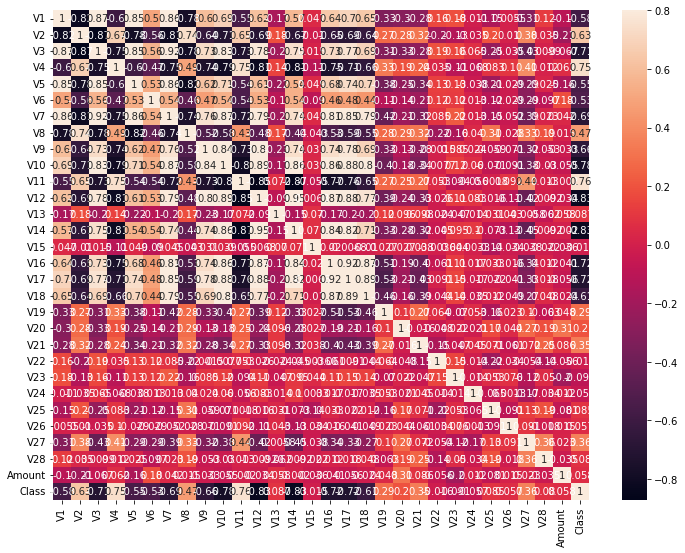

In [23]:
# plot the correlation matrix
fig = plt.figure(figsize=(12,9))
sns.heatmap(cor,vmax=0.8, annot = True)
plt.show()

Orange means positive and black means negative. Stronger the color, greater is the correlation magnitude.

In [24]:
# sort the values in the matrix and see the strength of correlation between 
# various feature pairs in an increasing or decreasing order.
corr_pairs = cor.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
sorted_pairs

V2     V3      -0.870836
V3     V2      -0.870836
V14    V11     -0.868938
V11    V14     -0.868938
       V12     -0.851760
                  ...   
V25    V25      1.000000
V26    V26      1.000000
V27    V27      1.000000
V15    V15      1.000000
Class  Class    1.000000
Length: 900, dtype: float64

In [25]:
# choose pairs with a negative correlation
negative_pairs = sorted_pairs[sorted_pairs < 0]
negative_pairs

V2      V3       -0.870836
V3      V2       -0.870836
V14     V11      -0.868938
V11     V14      -0.868938
        V12      -0.851760
                    ...   
Amount  V11      -0.001978
V14     Amount   -0.001964
Amount  V14      -0.001964
V9      V22      -0.001473
V22     V9       -0.001473
Length: 450, dtype: float64

In [26]:
# choose pairs Selecting strong correlation pairs (magnitude greater than 0.5)
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
strong_pairs

V2     V3      -0.870836
V3     V2      -0.870836
V14    V11     -0.868938
V11    V14     -0.868938
       V12     -0.851760
                  ...   
V25    V25      1.000000
V26    V26      1.000000
V27    V27      1.000000
V15    V15      1.000000
Class  Class    1.000000
Length: 282, dtype: float64

###### Feature scaling

In [30]:
# scaling 
df_copy = df.drop('Class', axis=1)
cols = df_copy.columns

# Scale only columns that have values greater than 1
#to_scale = [col for col in df.columns if df[col].max() > 1]
scaler = StandardScaler()
scaled = scaler.fit_transform(df_copy)
scaled

scaled_df = pd.DataFrame(scaled,columns = cols)
scaled_df

# Replace original columns with scaled ones
for col in scaled_df:
    df[col] = scaled_df[col]

df.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.032948,-0.394145,0.646277,0.134938,0.148595,0.435179,0.339577,-0.142549,0.502593,0.358720,...,-0.176594,0.628131,-0.055409,0.136912,-0.006375,-0.492880,0.048932,-0.042151,0.409444,0
1,0.586187,-0.262629,0.171613,-0.243681,0.274110,0.074979,0.255545,-0.148000,0.146452,0.277574,...,-0.430542,-0.787110,0.235909,-0.538511,0.064448,0.191329,-0.194438,0.063338,-0.356033,0
2,-0.032596,-0.885927,0.493427,-0.271517,0.096642,1.319968,0.485223,-0.082820,-0.577796,0.395504,...,0.149370,1.390704,1.347634,-1.118725,-0.842702,-0.384239,-0.273608,-0.156255,1.602698,0


###### Handle Imbalanced data 

In [31]:
# distribution of independent variable 
df['Class'].value_counts()

0    997
1    194
Name: Class, dtype: int64

Text(0, 0.5, 'Count')

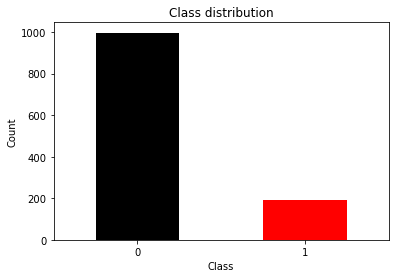

In [32]:
# Let's plot the Class against the Frequency
classes = pd.value_counts(df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0, color = ['black','red'])
plt.title("Class distribution")
plt.xlabel("Class")
plt.ylabel("Count")

This is an imbalanced data set. We will use SMOTE algorithm to handle this problem.

- Algorithms may get biased towards the majority class and thus tend to predict output as the majority class.
- Minority class observations look like noise to the model and are ignored by the model.
- Imbalanced dataset gives misleading accuracy score.

In [33]:
# independent variables
X = df.drop(['Class'],axis = 1)
X.shape

(1191, 29)

In [34]:
# dependent variables
y = df['Class']
y.shape

(1191,)

In [35]:
# use smote-oversampling algorithm to handle class imbalance
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X,y)

print('Shape of X, before SMOTE:', X.shape)
print('Shape of X after SMOTE:' ,X_sm.shape)

Shape of X, before SMOTE: (1191, 29)
Shape of X after SMOTE: (1994, 29)


In [36]:
y_sm.value_counts(normalize=True) * 100

0    50.0
1    50.0
Name: Class, dtype: float64

There are 1994 data points instead of 1191 because of over-sampling, and the class balance is perfect — 50:50.

###### Feature Encoding

Encoding of categorical variables is not needed as all the independent variables are numeric.


### 4. Training and Testing Data split

In [37]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)


In [38]:
# print train and test shapes
print(X_train.shape,y_train.shape)

(1495, 29) (1495,)


In [39]:
print(X_test.shape,y_test.shape)

(499, 29) (499,)


### 5. Model Building

In [40]:
# create the KNN model with default parameters
knn = KNeighborsClassifier(n_neighbors=3)

In [41]:
# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
# predict test results
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,

###### predict_proba

predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.

In [43]:
# probability of getting output as 0 - Not Fraud
knn.predict_proba(X_test)[:,0]

array([1.        , 0.        , 1.        , 0.        , 0.33333333,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.66666667, 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.66666667, 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.33333333, 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.66666667, 1.        , 1.     

In [44]:
# probability of getting output as 1 - Fraud
knn.predict_proba(X_test)[:,1]

array([0.        , 1.        , 0.        , 1.        , 0.66666667,
       1.        , 0.        , 1.        , 1.        , 1.        ,
       0.33333333, 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.33333333, 0.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.66666667, 1.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 0.33333333, 0.        , 0.     

### 6. Check accuracy score

In [45]:
# testing accuracy
accuracy_score(y_test, y_pred)

0.9859719438877755

In [46]:
# training accuracy
y_pred_train = knn.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.988628762541806

y_test are the true class labels and y_pred are the predicted class labels in the test-set.

###### Compare the train-set and test-set accuracy

In [47]:
# training score 
knn.score(X_train, y_train)

0.988628762541806

In [48]:
knn.score(X_test, y_test)

0.9859719438877755

The training-set accuracy score is 0.95 while the test-set accuracy to be 0.94. These two values are quite comparable. So, there is no overfitting.

### 7. Hyper parameter tuning to find optimal k

In [49]:
n = np.arange(1,100)
train_accuracy =np.empty(len(n))
test_accuracy = np.empty(len(n))

for i,k in enumerate(n):
    
    # setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    
    # fit the model
    knn.fit(X_train,y_train.ravel())
    
    # compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    
    # compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test.ravel()) 
    
print(train_accuracy)
print(test_accuracy)

[1.         0.99866221 0.98862876 0.98862876 0.98461538 0.9826087
 0.9812709  0.97725753 0.97525084 0.97324415 0.97324415 0.97658863
 0.97525084 0.97792642 0.97658863 0.97525084 0.97324415 0.97257525
 0.97190635 0.96923077 0.97056856 0.96856187 0.96989967 0.96588629
 0.96655518 0.96588629 0.96655518 0.9632107  0.9638796  0.96187291
 0.96187291 0.96053512 0.96053512 0.95585284 0.95652174 0.95585284
 0.95585284 0.95317726 0.95451505 0.95183946 0.95183946 0.95183946
 0.95183946 0.95183946 0.95183946 0.94983278 0.95050167 0.94983278
 0.95050167 0.94849498 0.94849498 0.94715719 0.94782609 0.94782609
 0.94715719 0.9458194  0.94648829 0.94247492 0.94314381 0.94314381
 0.94314381 0.94314381 0.94314381 0.94247492 0.94314381 0.94247492
 0.94314381 0.94247492 0.94247492 0.94113712 0.94046823 0.93979933
 0.94046823 0.94113712 0.94113712 0.94046823 0.94046823 0.94113712
 0.94113712 0.94046823 0.94046823 0.93979933 0.93979933 0.93913043
 0.93913043 0.93913043 0.93913043 0.93913043 0.93913043 0.93712

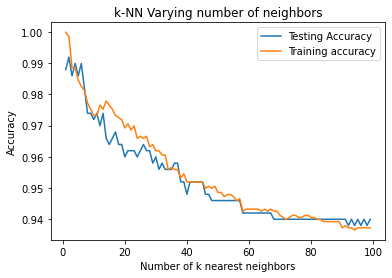

In [50]:
# generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(n, test_accuracy, label='Testing Accuracy')
plt.plot(n, train_accuracy, label='Training accuracy')
plt.legend(loc='upper right',fontsize=10)
plt.xlabel('Number of k nearest neighbors')
plt.ylabel('Accuracy')
plt.show()

Training and Testing accuracy is higher for lower value of k. 

In [51]:
#idx = np.where(test_accuracy == max(test_accuracy))
x = n[np.where(test_accuracy == max(test_accuracy))]
x

array([2])

### 8. Rebuild the model with optimal k value

In [52]:
# knn_classification

knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=2)

In [53]:
# predicting labels for testing set
y_pred_optimal=knn.predict(X_test)

In [54]:
# generate the classification report
print(classification_report(y_test,y_pred_optimal))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       250
           1       0.98      1.00      0.99       249

    accuracy                           0.99       499
   macro avg       0.99      0.99      0.99       499
weighted avg       0.99      0.99      0.99       499



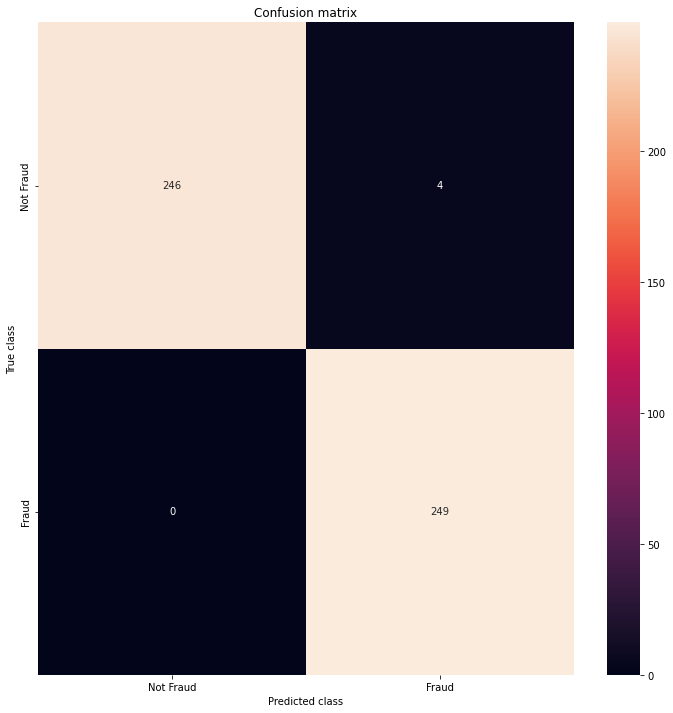

In [55]:
# create confusion matrix
import seaborn as sns
LABELS = ['Not Fraud', 'Fraud']
cm = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(12, 12))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Conclusion

Our KNN classifier has turned out to be a very good classifier with 99% accuracy.